In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/food-com-recipes-and-user-interactions/PP_users.csv
/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_test.csv
/kaggle/input/food-com-recipes-and-user-interactions/PP_recipes.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_train.csv
/kaggle/input/food-com-recipes-and-user-interactions/interactions_validation.csv
/kaggle/input/food-com-recipes-and-user-interactions/ingr_map.pkl
/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv


**Predict Rating of recipe basis the Review given by User**

In [2]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

# For displaying images in ipython
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
df = pd.read_csv("/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv")

In [4]:
print(df.shape)
df.head()

(1132367, 5)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [5]:
df["count"] = [1] * len(df)
df.head()

,user_id,recipe_id,date,rating,review,count
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,1
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",1
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,1
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,1
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",1


In [6]:
# pivot_table = df.pivot_table(values = "count" , index = "recipe_id" , columns = "rating", aggfunc= np.sum,
#                             fill_value = 0)

In [7]:
# pivot_table.head(n=4)

In [8]:
# pivot_table["Total Rating"] = pivot_table.apply(lambda x : np.sum(x),axis = 1)

In [9]:
# pivot_table.head()

In [10]:
df["rating"].value_counts()

5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: rating, dtype: int64

In [11]:
df = df.dropna()
df = df[df["rating"] !=0]
df.shape

(1071351, 6)

In [12]:
df["rating"].value_counts()

5    816229
4    187333
3     40852
2     14122
1     12815
Name: rating, dtype: int64

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
def create_wordcloud(dframe):
    unique_ratings = dframe["rating"].unique()
    # Create stopword list:
    stopwords = set(STOPWORDS)
    for rating in unique_ratings:
        temp_text = dframe[dframe["rating"]== rating]["review"]
        collapsed_temp_text = temp_text.str.cat(sep=' ')
        
        print("Word Cloud for Rating: %s"%(rating))

        # Generate a word cloud image
        wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_temp_text)

        # Display the generated image:
        # the matplotlib way:1
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

Word Cloud for Rating: 4


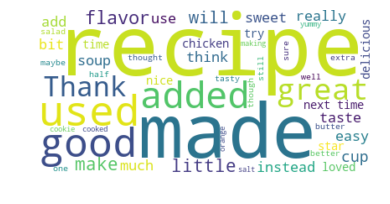

Word Cloud for Rating: 5


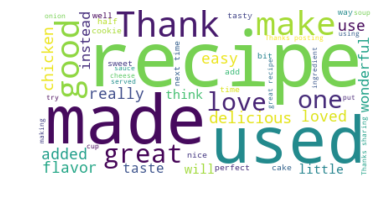

Word Cloud for Rating: 2


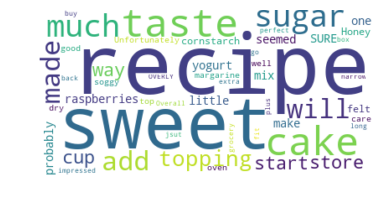

Word Cloud for Rating: 3


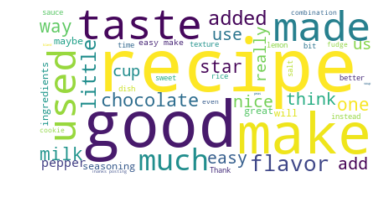

Word Cloud for Rating: 1


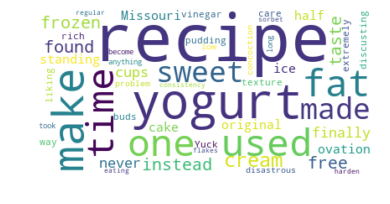

In [15]:
create_wordcloud(dframe = df.iloc[0:1000,:])

In [16]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB(
                    fit_prior=True, class_prior=None)),
    ])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df["review"][0:100000]
                                                    , df["rating"][0:100000],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((80000,), (20000,), (80000,))

In [18]:
model = clf.fit(X_train , y_train)

In [19]:
print("Accuracy of Prediction on Test Data: %s"%model.score(X_test,y_test))

Accuracy of Prediction on Test Data: 0.7594


**Using Random Forest Classifier**

In [20]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df["review"][0:100000]
                                                    , df["rating"][0:100000],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((80000,), (20000,), (80000,))

In [22]:
model = clf.fit(X_train , y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
print("Accuracy of Prediction on Test Data: %s"%model.score(X_test,y_test))

Accuracy of Prediction on Test Data: 0.76485


**Hyper Parameter Tuning**

In [24]:
param_grid = {
    'classifier__criterion': ["gini","entropy"],
    #'classifier__max_features': ["auto","sqrt","log2"],
    'classifier__max_depth':[4,6],
    'classifier__n_estimators':[100,150,200]
}

grid_search = GridSearchCV(clf, param_grid, cv=3, iid=False,verbose = 1,n_jobs= -1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [25]:
print("Accuracy of Prediction on Test Data: %s"%grid_search.score(X_test,y_test))

Accuracy of Prediction on Test Data: 0.75935
